# Exploratory Code

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED=42

# Dataset

In [2]:
df = pd.read_csv('./data/austin_car_crash_cleaned.csv')

In [3]:
display(df.head())

,fatal_crash,primary_address,secondary_address,speed_limit,construction_zone,latitude,longitude,crash_severity,nonincap_injry_cnt,non_injry_cnt,...,motorcycle_death_count,motorcycle_serious_injury_count,other_death_count,other_serious_injury_count,micromobility_serious_injury_count,micromobility_death_count,timestamp_us_central,law_enforcement_fatality_count,estimated_maximum_comprehensive_cost,estimated_total_comprehensive_cost
0,False,2800 N LAMAR BLVD,SAN GABRIEL ST,35,False,30.244344,-97.781309,3,0,1,...,0,0,0,0,0,0,2014-01-08 13:35:00,0,200000,820000
1,False,1800 LAVACA ST,W 18TH ST,30,False,30.280295,-97.740912,0,0,0,...,0,0,0,0,0,0,2014-01-19 05:31:00,0,20000,20000
2,False,7500 NOT REPORTED,CONVICT HILL RD,65,False,30.216696,-97.848713,5,0,3,...,0,0,0,0,0,0,2014-01-08 14:30:00,0,20000,60000
3,False,3400 W SLAUGHTER LN LN,SLAUGHTER LN,45,False,30.182598,-97.847707,3,0,3,...,0,0,0,0,0,0,2014-01-22 08:34:00,0,200000,260000
4,False,800 CAPITOL OF TEXAS HWY,W LAS CIMAS PKWY,60,False,30.290776,-97.828303,5,0,2,...,0,0,0,0,0,0,2014-01-02 11:41:00,0,20000,40000


In [4]:
print(df.shape)

(163596, 30)


In [5]:
print(df.columns)

Index(['fatal_crash', 'primary_address', 'secondary_address', 'speed_limit',
       'construction_zone', 'latitude', 'longitude', 'crash_severity',
       'nonincap_injry_cnt', 'non_injry_cnt', 'unkn_injry_cnt',
       'tot_injry_cnt', 'death_cnt', 'units_involved',
       'motor_vehicle_death_count', 'motor_vehicle_serious_injury_count',
       'bicycle_death_count', 'bicycle_serious_injury_count',
       'pedestrian_death_count', 'pedestrian_serious_injury_count',
       'motorcycle_death_count', 'motorcycle_serious_injury_count',
       'other_death_count', 'other_serious_injury_count',
       'micromobility_serious_injury_count', 'micromobility_death_count',
       'timestamp_us_central', 'law_enforcement_fatality_count',
       'estimated_maximum_comprehensive_cost',
       'estimated_total_comprehensive_cost'],
      dtype='object')


# Missing data

In [6]:
display(df.isnull().sum())

fatal_crash                             0
primary_address                         0
secondary_address                       0
speed_limit                             0
construction_zone                       0
latitude                                0
longitude                               0
crash_severity                          0
nonincap_injry_cnt                      0
non_injry_cnt                           0
unkn_injry_cnt                          0
tot_injry_cnt                           0
death_cnt                               0
units_involved                          0
motor_vehicle_death_count               0
motor_vehicle_serious_injury_count      0
bicycle_death_count                     0
bicycle_serious_injury_count            0
pedestrian_death_count                  0
pedestrian_serious_injury_count         0
motorcycle_death_count                  0
motorcycle_serious_injury_count         0
other_death_count                       0
other_serious_injury_count        

# Distribution

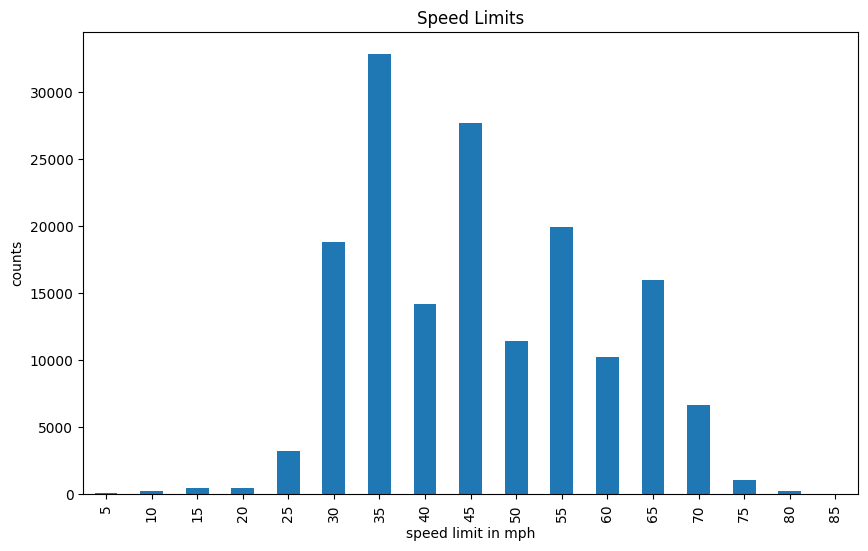

In [7]:
plt.figure(figsize=(10, 6))
df['speed_limit'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title('Speed Limits')
plt.xlabel('speed limit in mph')
plt.ylabel('counts')
plt.show()

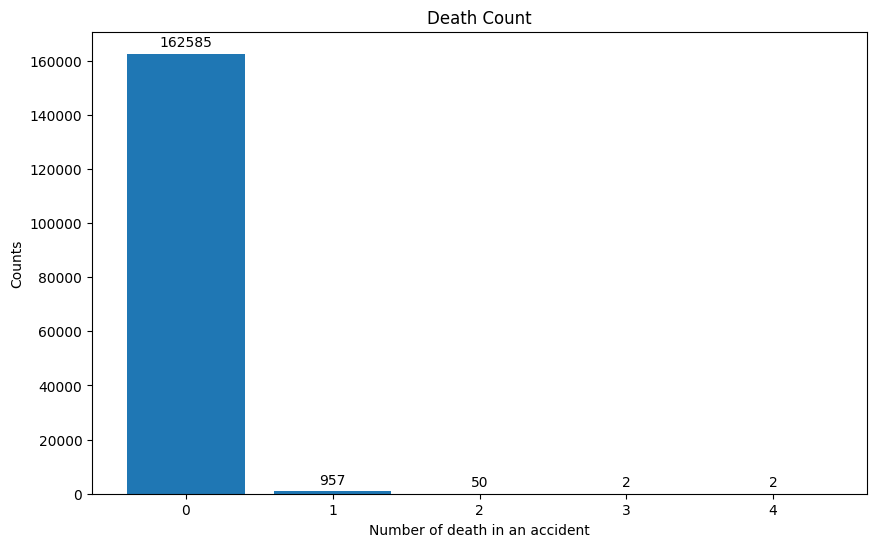

In [ ]:
plt.figure(figsize=(10, 6))
counts = df['death_cnt'].value_counts().sort_index(ascending=True)
bars = plt.bar(counts.index, counts)
plt.bar_label(bars, padding=3)
plt.title('Death Count')
plt.xlabel('Number of death in an accident')
plt.ylabel('Counts')
plt.show()

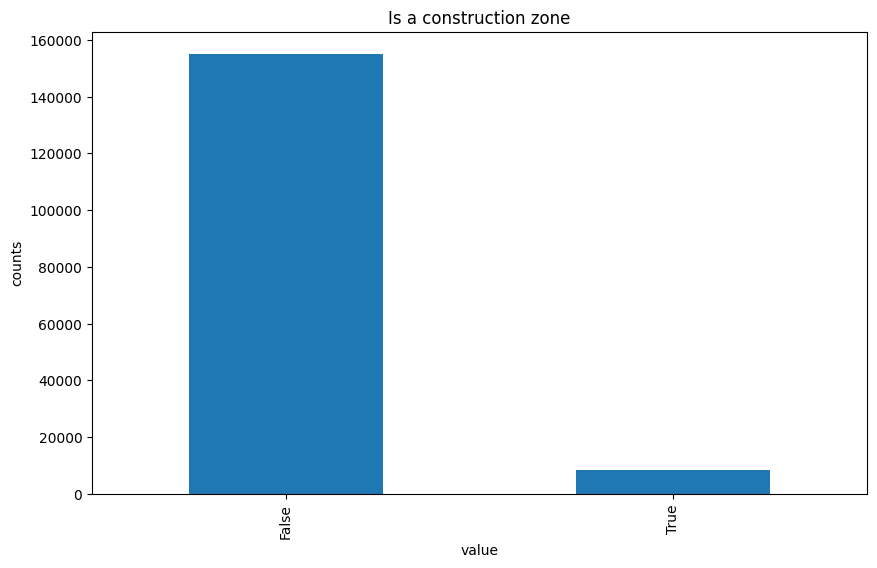

In [11]:
plt.figure(figsize=(10, 6))
df['construction_zone'].value_counts().plot(kind='bar')
plt.title('Is a construction zone')
plt.xlabel('value')
plt.ylabel('counts')
plt.show()

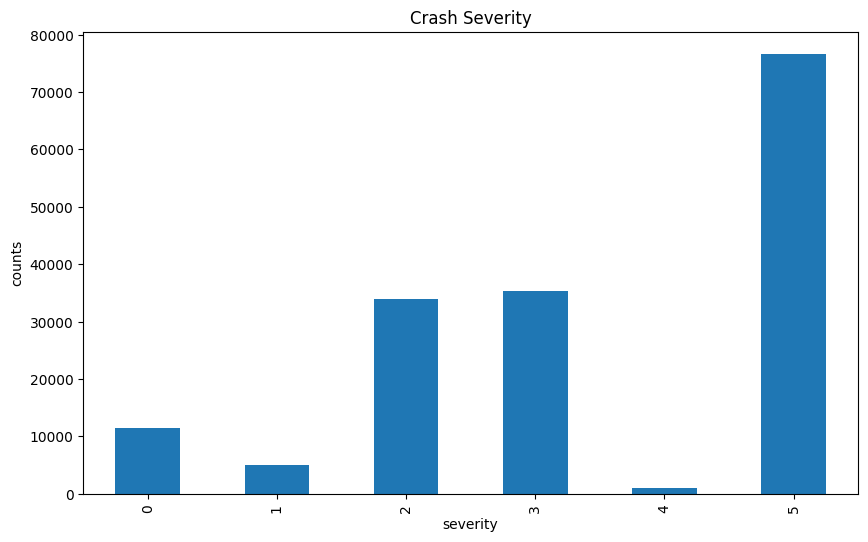

In [14]:
plt.figure(figsize=(10, 6))
df['crash_severity'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title('Crash Severity')
plt.xlabel('severity')
plt.ylabel('counts')
plt.show()

In [20]:
from utils.plot_utils import create_folium_density_heatmap

map = create_folium_density_heatmap(df['latitude'], df['longitude'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().